In [326]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

In [327]:
def pps(n,ND) :
    P=n*100/ND
    PP= "{:.2f}".format(P)
    print("\r",end="")
    print("processes",PP,"% completed:   ",end="")
    i=50*n/ND
    a=50-int(i)
    b=(int(i)+1)*"🟩"
    c=(a-1)*"⬜️"
    print(b,end="")
    print(c, end="")
    if n==ND:
        print("\r","computing successfully completed!   ",50*"🟦")

In [328]:
def Initial_condition(den):
    Graph=nx.read_gpickle('Graph.gpickle')
    for i in Graph.nodes:
        if den>np.random.rand():
            Graph.nodes[i]['x']=1
        else:
            Graph.nodes[i]['x']=0
    x=np.random.randint(50)
    y=np.random.randint(50)
    Graph.nodes[x,y]['x']=2
    return Graph

In [329]:
def Move_it():
    for i in G.nodes:
        if G.nodes[i]['x']!=0:
            ret=0
            adjnum=4
            adj=list(G.adj[i])
            while ret==0 and adjnum>0:
                r=np.random.randint(adjnum)
                if adj[r]==0:
                    G.nodes[adj[r]]['x']=G.nodes[i]['x']
                    G.nodes[i]['x']=0
                    ret=1
                adj.remove(adj[r])
                adjnum-=1

In [330]:
"""def Move_it():
    for i in G.nodes:
        if G.nodes[i]['x']!=0:
            adj=list(G.adj[i])
            r=np.random.randint(4)
            rec=G.nodes[adj[r]]['x']
            G.nodes[adj[r]]['x']=G.nodes[i]['x']
            G.nodes[i]['x']=rec"""

"def Move_it():\n    for i in G.nodes:\n        if G.nodes[i]['x']!=0:\n            adj=list(G.adj[i])\n            r=np.random.randint(4)\n            rec=G.nodes[adj[r]]['x']\n            G.nodes[adj[r]]['x']=G.nodes[i]['x']\n            G.nodes[i]['x']=rec"

In [331]:
def Count_nodes(Graph):
    snode=[]
    inode=[]
    rnode=[]
    for n_1 in Graph.nodes:
        if Graph.nodes[n_1]['x']==1:
            snode.append(n_1)
        if Graph.nodes[n_1]['x']==2:
            inode.append(n_1)  
        if Graph.nodes[n_1]['x']==3:
            rnode.append(n_1)
    return (snode,inode,rnode)

In [332]:
def Transmition(d,p,q,snode,inode):
    for i in snode:
        for j in inode:
            if nx.shortest_path_length(G, source=i, target=j)<d and p>np.random.rand():
                G.nodes[i]['x']=2
    for i in inode:
        if q>np.random.rand():
            G.nodes[i]['x']=3

In [333]:
def dynamic(d,p,q):
    (snode,inode,rnode)=Count_nodes(G)
    sdata=[]
    idata=[]
    rdata=[]
    while len(inode)!=0:
        Move_it()
        (snode,inode,rnode)=Count_nodes(G)
        Transmition(d,p,q,snode,inode)
        sdata.append(len(snode))
        idata.append(len(inode))
        rdata.append(len(rnode))
    RES=[sdata,idata,rdata]
    return RES

In [334]:
G=Initial_condition(0.02)
res=dynamic(12,0.6,0.8)

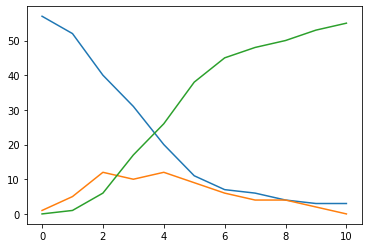

In [335]:
plt.plot(res[0])
plt.plot(res[1])
plt.plot(res[2])

In [336]:
res[1][-1]

0